# Statistical Estimation

When scientists wish to estimate a value, they avoid a "point estimate" and prefer instead a **confidence interval** estimate. We are in search of an interval which, under repeated sampling, will capture the mean inside that interval a specified percentage of the time.

## Example 1: Sleep Variable
Let's consider a brief example where researchers wish to esimate the average number of hours of sleep students on the UNG Dahlonega campus get per night. 

### Data Summary

Let's load, subset and summarize the correct vector of values:

In [1]:
pers <- read.csv('https://faculty.ung.edu/rsinn/data/personality.csv')
sleep <-pers[,'Sleep']
cat ("Descriptive Statistics: \n  Mean =", round(mean(sleep),2), "\n  Standard Deviation =", round(sd(sleep),2), "\n  Sample Size =", length(sleep),"\n\nThe 5-number summary is shown below.")
summary(sleep)

Descriptive Statistics: 
  Mean = 6.24 
  Standard Deviation = 2.13 
  Sample Size = 129 

The 5-number summary is shown below.

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.50    5.00    6.50    6.24    7.50   11.00 

### Shape

To better understand the shape of population from which the data were drawn, let's plot a histogram and density plot.

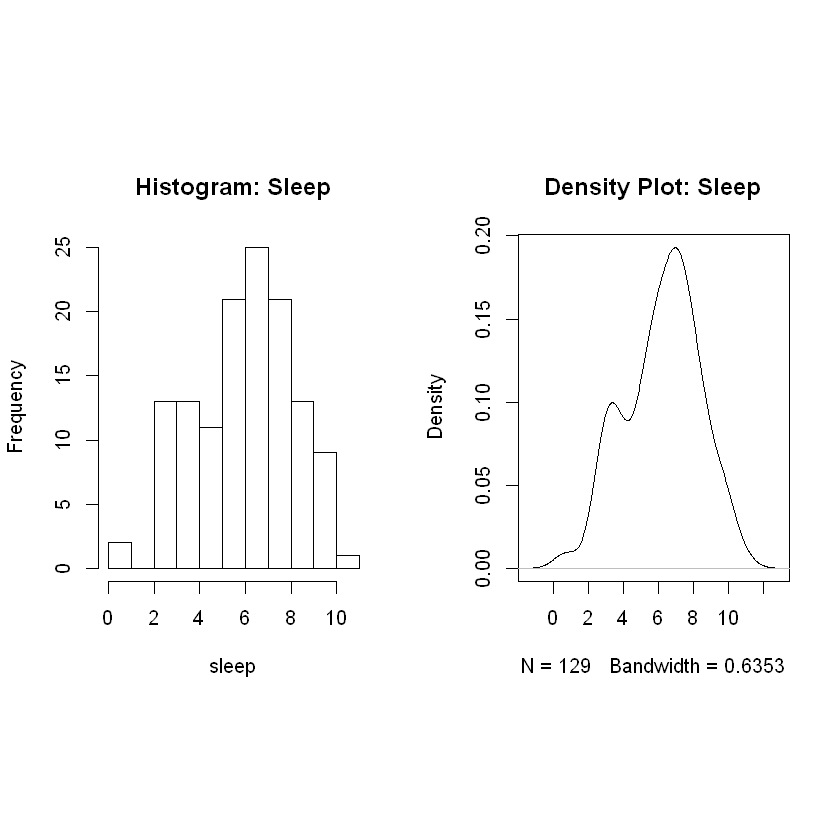

In [2]:
layout(matrix(c(1,2), ncol = 2), height = lcm(12))
hist(sleep, main = 'Histogram: Sleep')
plot(density(sleep), main = 'Density Plot: Sleep')

We find the distribution approximately normal and skewed left with possible (mild) evidence of bimodality. The data are appropriate for $t$-procedures, yet a pronounced and obvious bimodality might force us to reject the data as inappropriate.

### Estimate Using R

**Question:** Find a 95% confidence interval estimate for the mean hours of sleep per night for UNG Dahlonega students using the *personality.csv* data set.

To answer, we can use the **t.test** function which returns the confidence interval for any test we run. Here, we choose $\mu = 7$ so that the function will run, not for any statistical reason.

In [3]:
t.test(sleep, mu = 7)


	One Sample t-test

data:  sleep
t = -4.048, df = 128, p-value = 8.886e-05
alternative hypothesis: true mean is not equal to 7
95 percent confidence interval:
 5.868974 6.611646
sample estimates:
mean of x 
  6.24031 


#### Solution
The 95% confidence interval for the mean of the Sleep variable is between $5.87$ and $6.61$. 

**Meaning:** We are confident that, using repeated samples of identical size from the same population, the mean of those samples will fall within the interval 95\% of the time.

In interval notation, we have the following:

$$\mu \in (5.87, 6.61)$$

#### Changing the Confidence Level
Notice that the 95\% level of confidence is the default. We can change it when needed, for example to 90\%, using the **conf.level** option inside the *t.test*:

In [8]:
t.test(sleep, mu = 7, conf.level = 0.90)


	One Sample t-test

data:  sleep
t = -4.048, df = 128, p-value = 8.886e-05
alternative hypothesis: true mean is not equal to 7
90 percent confidence interval:
 5.929371 6.551249
sample estimates:
mean of x 
  6.24031 


### Estimate Using Tables and Formulas

The class [formula sheet](https://faculty.ung.edu/rsinn/3350/StatsFormulas.pdf) specifies that the $t$ confidence interval for a population mean is given by:
$$\mu = \bar x \pm t^*\frac{s}{\sqrt n}$$

with $t^*$ from the $t$-distribution with degrees of freedom as follows: $df = n−1$.

Thus, with $t^*$ from our [class's $t$ table](https://faculty.ung.edu/rsinn/3350/Table_T.pdf) and $df=129-1 = 128$ we have:
$$\begin{align}
\mu &= 6.24 \pm (1.984)\frac{2.13}{\sqrt{129}}\implies\\ \mu&= 6.24 \pm 0.372\\ \mu&= (5.868, 6.612)\end{align}$$



Note that these values closely match the ones calculated by R and that the interpretation of the interval is identical to what is presented above.

## Example 2: Political Polling

### Using $z$-Proportion Confidence Intervals

If we are estimating the support for our condidate in an upcoming election and have polling data show that, in the Atlanta metro area, 512 likely voters will vote for her while 487 will vote against.

### Data

We must first create an observed matrix for the data collected which proceeds as follows:

In [9]:
obs <- matrix(c(512,486),ncol=2)
obs

512,486


### Assumptions

The assumptions for confidence intervals are the same as the statistical tests using that variable. In this case, we need:
1. A reasonably large sample, and
2. Proportional data

By inspection, the data clearly meet these requirements.

### Estimate Using R

We will be using the **prop.test** function because it performs $z$-proportion testing, and we wish to produce a $z$-proportion confidence interval.

In [10]:
prop.test(obs)


	1-sample proportions test with continuity correction

data:  obs, null probability 0.5
X-squared = 0.62625, df = 1, p-value = 0.4287
alternative hypothesis: true p is not equal to 0.5
95 percent confidence interval:
 0.4815254 0.5444252
sample estimates:
        p 
0.5130261 


#### Solution
The 95% confidence interval for the percentage of voters likely to vote for our candidate is between $48.2\%$ and $54.4\%$.

**Meaning:** We are confident that, given repeated samples of identical size ($n=998$) from the same population, the mean of those samples will fall within this interval 95\% of the time.

#### Changing the Confidence Level

As before, we can change the **conf.level** to $99\%$ as follows:

In [12]:
prop.test(obs, conf.level = 0.99)


	1-sample proportions test with continuity correction

data:  obs, null probability 0.5
X-squared = 0.62625, df = 1, p-value = 0.4287
alternative hypothesis: true p is not equal to 0.5
99 percent confidence interval:
 0.4718216 0.5540563
sample estimates:
        p 
0.5130261 


### Estimate Using Tables and Formulas

```{sidebar} The $z$ Table
The [$z$ table](https://faculty.ung.edu/rsinn/3350/Table_Z.pdf) provides percentiles and probabilities from the Standard Normal distribution where $N(0,1)$.
```

According to our [formula sheet](https://faculty.ung.edu/rsinn/3350/StatsFormulas.pdf), the large-sample $z$ confidence interval for a proportion $p$ is given by:

$$\text{prop} \in \hat{p} \pm z^* \sqrt{\frac{\hat{p}(1−\hat{p})}{n}}$$ 

where $z^*$ is from the Standard Normal distribution with $\alpha = 0.05$ as shown to the right.

In our table, we find the value $0.95$ between $z^* = 1.64$ and $z^* = 1.65$. We choose conservatively the smaller of the two, and thus we have:

$$z^*= 1.64$$

We note that the sample size is $n = 998$ and that $\hat p = \frac{512}{998} = 0.513$ which leads to the following for the confidence interval calculation:

$$\begin{align}\text{prop} \in &\hat{p} \pm (1.64) \sqrt{\frac{0.513(1−0.513)}{998}}\\ &=\hat{p} \pm (1.64) \sqrt{\frac{0.513(1−0.513)}{998}}\\ &=0.513  \pm 0.0259\\&=(0.487, 0.539)\\ \end{align}$$ 

The values above are within rounding error of the values produced by R. Thus, the interpretation is the same as above.